# TP 4: Support Vector Machines (SVM) & méthodes à noyau (Correction)

Dans ce TD, nous allons essayer de prédire l'espèce d'un pingouin à partir de ses caractéristiques physiques à l'aide de Support Vector Machines (SVM).

Pour cela nous allons utiliser le dataset *palmerpenguins*, une alternative au desormais classique *iris* de scikit-learn.
Pour plus d'informations, vous pouvez allez voir le site: https://allisonhorst.github.io/palmerpenguins/index.html

Il contient les caractéristiques de trois espèces de pingouins recensés sur l'archipel Palmer, au large de la côte nord-ouest de la peninsule Antarctique.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## I- Importer les données

### 1) avec pip
Pour installer le package permettant d'accéder aux données: **pip install palmerpenguins**

In [2]:
from palmerpenguins import load_penguins
penguins = load_penguins()

### 2) sous format csv
Si vous n'avez pas pip et que vous n'arrivez pas à télécharger le package d'une autre manière, vous avez les données sous forme .csv dans campus.

In [3]:
import pandas as pd
palmerpenguins = pd.read_csv("palmerpenguins_data.csv")

## II- Description du dataset 

In [4]:
palmerpenguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
import collections
print(palmerpenguins.shape)
print(collections.Counter(palmerpenguins.species))

(344, 8)
Counter({'Adelie': 152, 'Gentoo': 124, 'Chinstrap': 68})


**344** pingouins avec **8** attributs:
- *species* (l'espèce): Adelie (152 pingouins), Gentoo (124 pingouins) et Ginstrap (68 pingouis)
- *island* (l'île de recensement): Biscoe, Dream et Torgersen
- *bill_length_mm* : la longueur du bec en mm
- *bil_depth_mm*: largeur du bec en mm
- *flipper_length_mm*: largeur des palmes en mm
- *body_mass_g*: poids en g
- *sex*: male et female
- *year*: année du recensement

### Données manquantes

In [6]:
palmerpenguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Vous remarquez qu'il y a certaines observations pour lesquelles il manque des informations. C'est ce que l'on appelle des **données manquantes** (ou **missing values**). 
Nous décidons ici d'ignorer ces observations. Nous n'avons donc plus que 342 étiquettes à prédire.

In [7]:
palmerpenguins = palmerpenguins[palmerpenguins['bill_depth_mm'].notna()]
palmerpenguins = palmerpenguins.reset_index()
palmerpenguins.shape

(342, 9)

Au lieu d'ignorer les observations incomplètes, une solution qui s'avère souvent meilleure (du point de vue des performances de modèles décisionnels construits à partir des données) consiste à **estimer** (ou **impute**) les données manquantes et à traiter les valeurs estimées comme des valeurs mesurées. 

Pour cela nous aurions pu utiliser la fonction *SimpleImputer* de *sklearn.impute*. Pour plus d'informations, vous pouvez aller voir le site: https://scikit-learn.org/stable/modules/impute.html#impute

### Variables

Pour la suite du TP, nous allons seulement nous intéresser aux variables numériques *bill_depth_mm*,  *bill_length_mm*, *flipper_length_mm* et *body_mass_g*.

In [8]:
penguins_features = palmerpenguins[["bill_length_mm", "bill_depth_mm","body_mass_g", "flipper_length_mm"]]

### Etiquettes

Nous allons essayer de prédire l'espèce, qui correspond à **species** mais sous forme d'entiers. Il sera alors plus facile de manier l'espèce sous forme d'entiers que de texte.

In [9]:
species_names, species_int = np.unique(palmerpenguins.species, return_inverse=True)
print(species_names)

['Adelie' 'Chinstrap' 'Gentoo']


In [10]:
penguins_labels = pd.DataFrame(palmerpenguins["species"])
penguins_labels["species_int"] = species_int

In [11]:
penguins_labels

,species,species_int
0,Adelie,0
1,Adelie,0
2,Adelie,0
3,Adelie,0
4,Adelie,0
...,...,...
337,Chinstrap,1
338,Chinstrap,1
339,Chinstrap,1
340,Chinstrap,1


## III- SVM à noyau linéaire

### 1. Cas standard

Pour l'instant, nous allons nous limiter à **deux espèces (labels)** : **Adelie (0)** et **Gentoo (2)** et **deux variables 
 (features)** : *body_mass_g* et *bill_length_mm*.
 
Nous allons entrainer une **SVM linéaire** et afficher l'hyperplan séparateur (en 2D une droite donc).
Nous allons utiliser la classe [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) du module svm de scikit-learn.

In [12]:
from sklearn import svm

In [92]:
# Select the 2 features
data = penguins_features[penguins_labels["species_int"].isin([0,2])] 
data = np.array(data[["body_mass_g", "bill_length_mm"]])
print("X shape:", data.shape)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,2])]
labels = np.array(labels["species_int"])
print("y shape:", labels.shape)

# initialize a model
clf = svm.SVC(kernel='linear', C=1)

# fit the model
clf.fit(X= data, y = labels)

X shape: (274, 2)
y shape: (274,)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Représentons l'hyperplan séparateur !

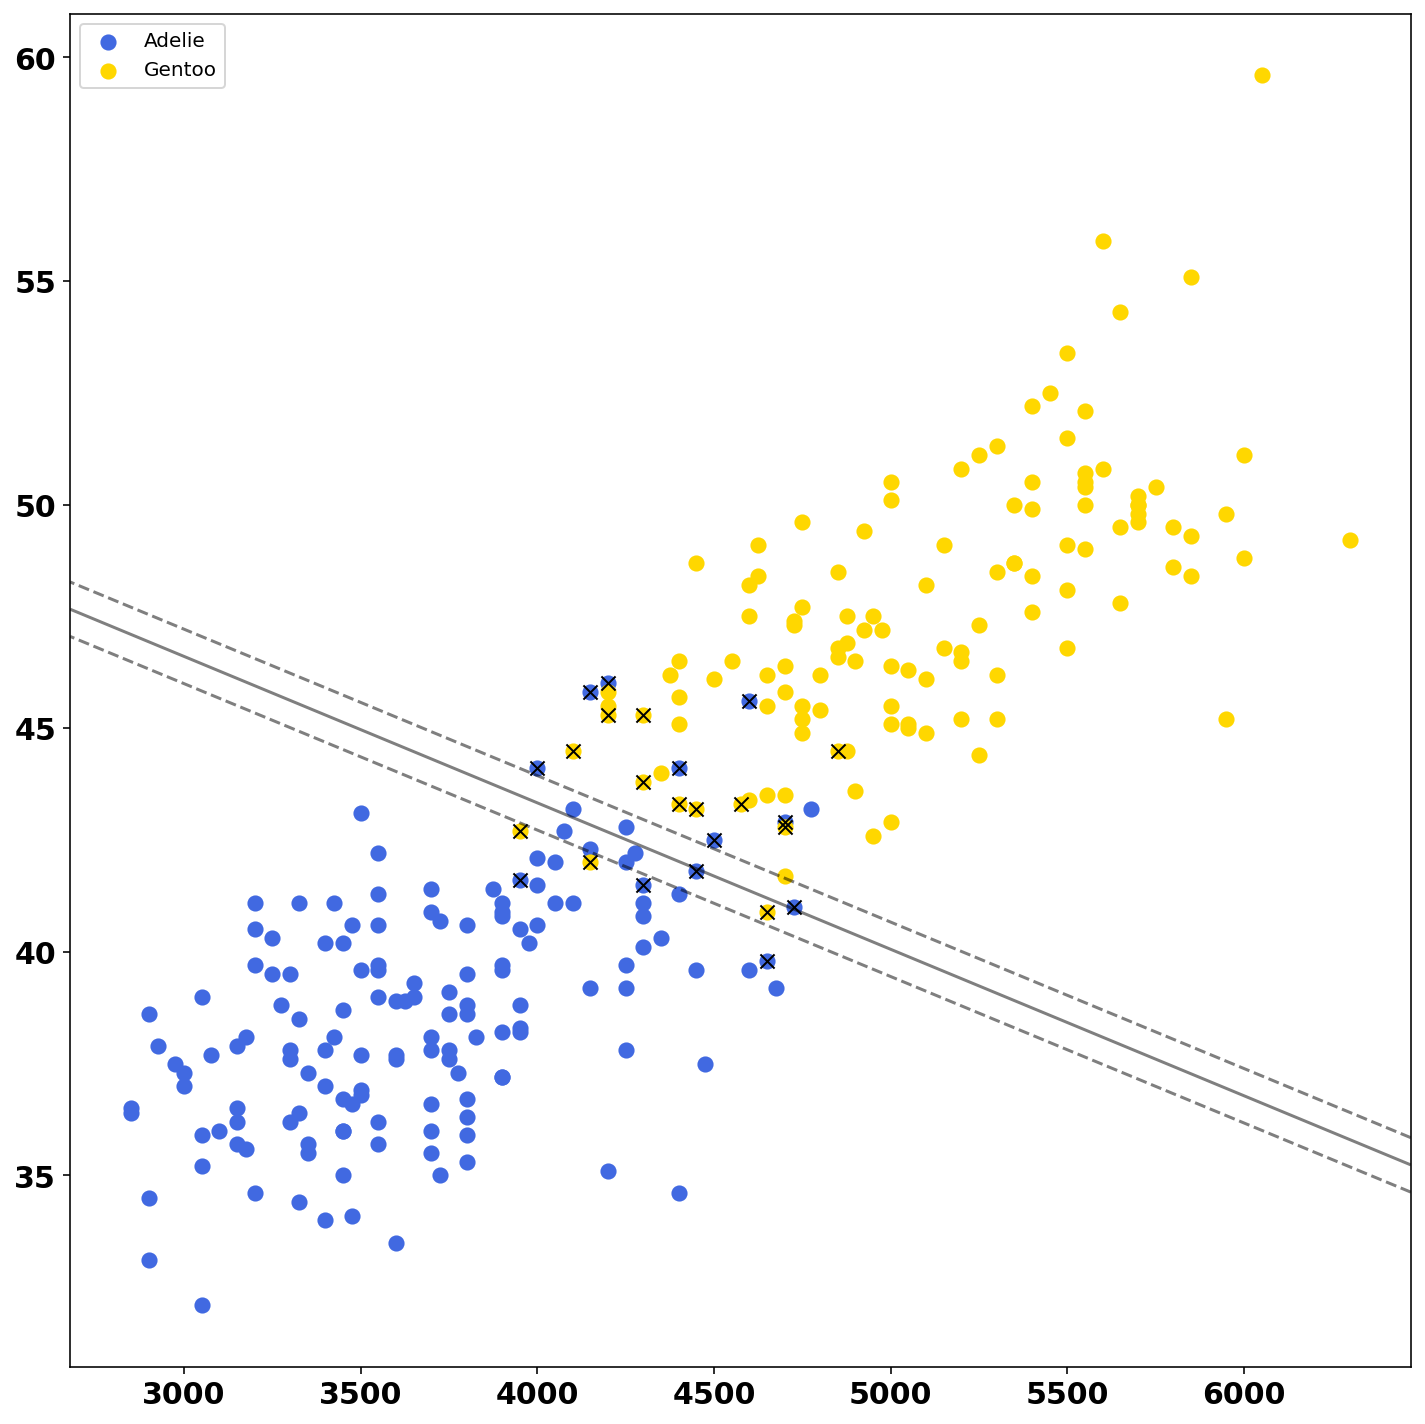

In [93]:
plt.figure(figsize=(10, 10))

# plot the point cloud
adelie = plt.scatter(penguins_features[penguins_labels["species_int"]==0]['body_mass_g'], 
                    penguins_features[penguins_labels["species_int"]==0]['bill_length_mm'], 
                    color="royalblue", 
                    s=50, 
                    label = 'Adelie',
                    cmap=plt.cm.Paired)

gentoo = plt.scatter(penguins_features[penguins_labels["species_int"]==2]['body_mass_g'], 
                    penguins_features[penguins_labels["species_int"]==2]['bill_length_mm'], 
                    color="gold", 
                    s=50, 
                    label = 'Gentoo',
                    cmap=plt.cm.Paired)

plt.legend()

# get frame limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], 
           clf.support_vectors_[:, 1], 
           s=50, 
           linewidth=1, 
           marker='x', 
           color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])

# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

Affichons la performance du prédicteur :

In [16]:
print(clf.score(data, labels))

0.9452554744525548


In [17]:
help(clf.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.svm._classes.SVC instance
    Return the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



### Q1.

__Question :__ Quelle mesure de performance est calculée par [`clf.score`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score) ?

__Réponse :__ C'est la *mean accuracy*.

### 2. Standardisation des variables

Standardisons les variables (en leur retirant leur moyenne et en les divisant par leur écart-type) et regardons si cela a une influence sur la performance du SVM. Cette tâche est entièrement automatisée par `scikit-learn` :
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [19]:
from sklearn import preprocessing

# Select the 2 features
data = penguins_features[penguins_labels["species_int"].isin([0,2])] 
data = np.array(data[["body_mass_g", "bill_length_mm"]])

# Scale them
std_scale = preprocessing.StandardScaler().fit(data)
data_scaled = std_scale.transform(data)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,2])]
labels = np.array(labels["species_int"])

# initialize a model
clf = svm.SVC(kernel='linear', C=1)

# fit the model
clf.fit(X= data_scaled, y = labels)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

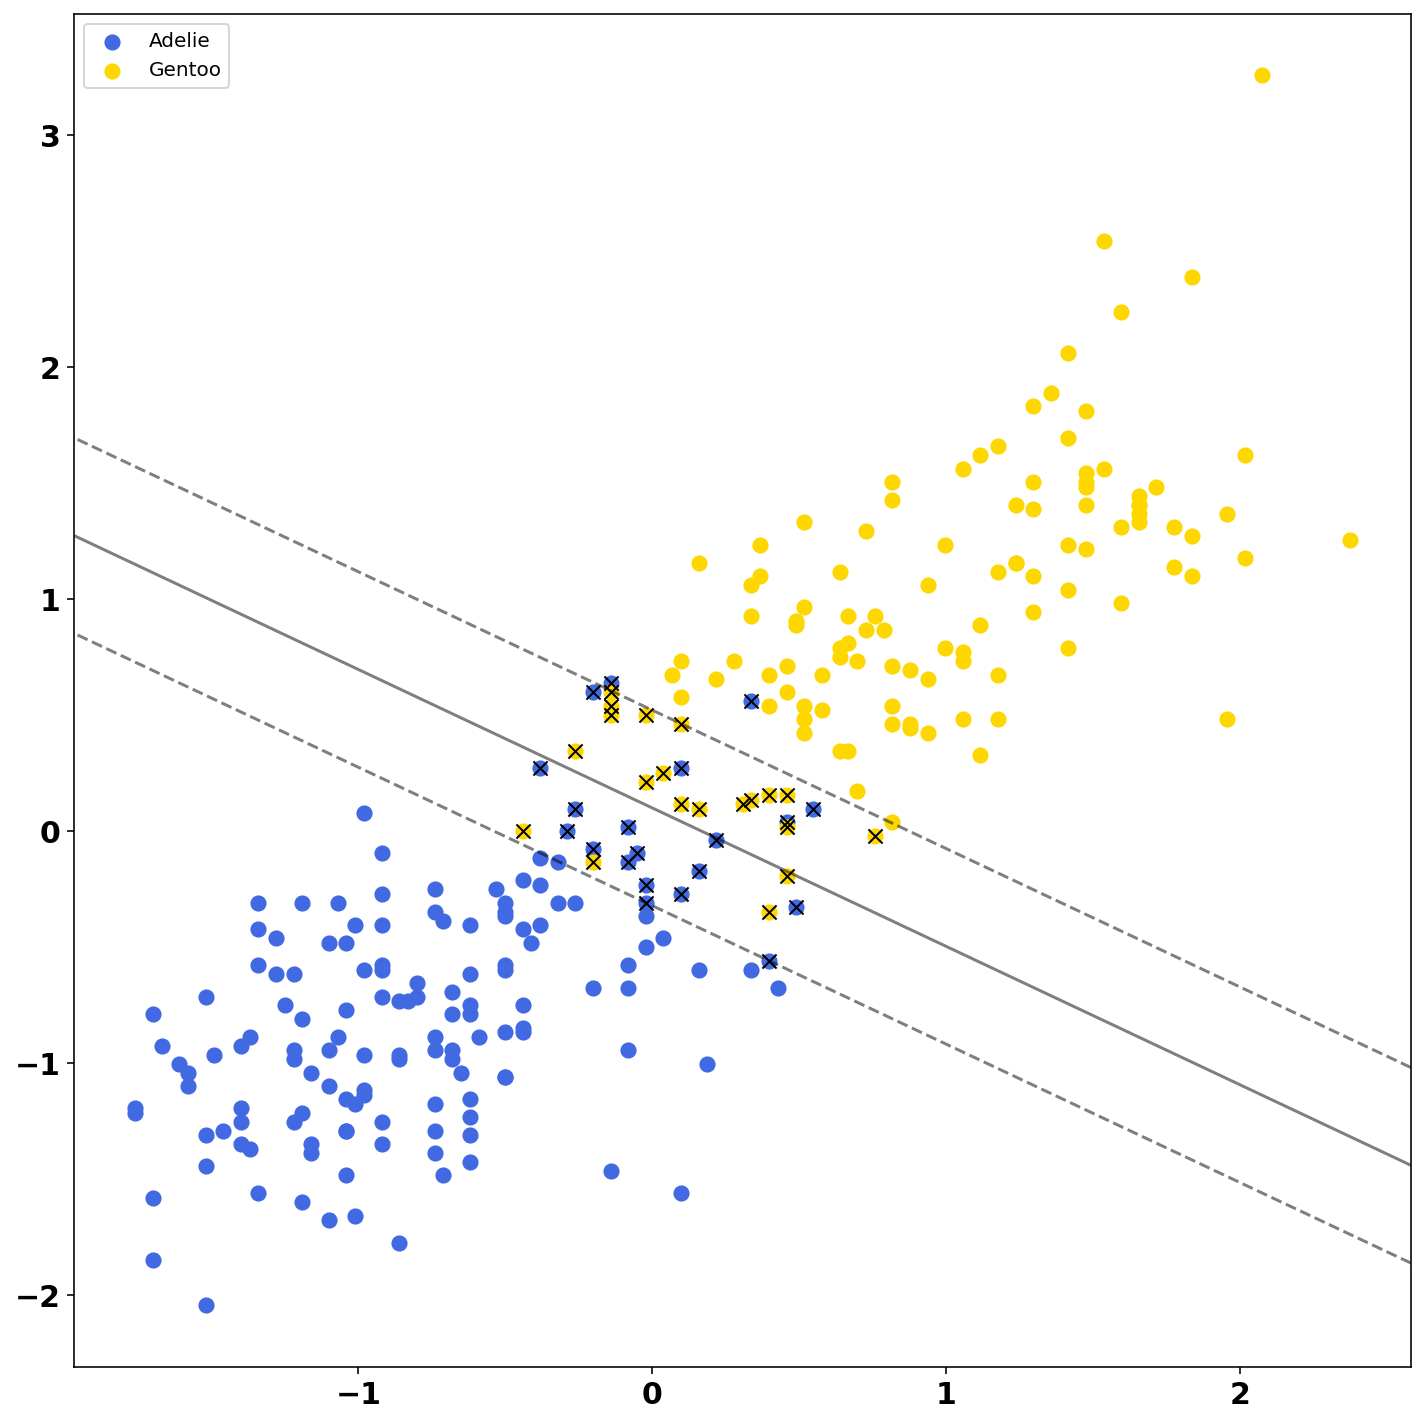

In [20]:
plt.figure(figsize=(10, 10))

# plot the point cloud
adelie = plt.scatter(data_scaled[np.where(penguins_labels["species_int"]==0),0], 
                    data_scaled[np.where(penguins_labels["species_int"]==0),1], 
                    color="royalblue", 
                    s=50, 
                    label = 'Adelie',
                    cmap=plt.cm.Paired)

gentoo = plt.scatter(data_scaled[np.where(penguins_labels["species_int"]==2),0], 
                    data_scaled[np.where(penguins_labels["species_int"]==2),1], 
                    color="gold", 
                    s=50, 
                    label = 'Gentoo',
                    cmap=plt.cm.Paired)

plt.legend()

# get frame limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], 
           clf.support_vectors_[:, 1], 
           s=50, 
           linewidth=1, 
           marker='x', 
           color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])

# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

In [21]:
print(clf.score(data_scaled, labels))

0.9635036496350365


### Q2.

__Question :__ Quel est l'effet de la standardisation des variables sur la performance du classifieur ? Comment pouvez vous l'interpréter ?

__Réponse :__ La standardisation des variables permet une meilleure performance du classifieur. S'il y a une grande différence entre deux variables, une variable va beaucoup plus “compter” que l’autre lors du calcul des similarités. En standardisant, on va ramener les variables à une même échelle et il n'y aura plus de biais dans le calcul de similarité.

Pour la suite du TP, nous allons donc standardiser toutes les variables.

In [22]:
std_scale = preprocessing.StandardScaler().fit(penguins_features)
penguins_features_scaled = pd.DataFrame(std_scale.transform(penguins_features), columns=penguins_features.columns)

### 3. Cas parfait

Cette fois, nous allons nous intéresser aux variables **bill_length_mm** et **bill_depth_mm**.

In [23]:
# Select the 2 features
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,2])] 
data = np.array(data[["bill_length_mm","bill_depth_mm"]])
print("X shape:", data.shape)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,2])]
labels = np.array(labels["species_int"])
print("y shape:", labels.shape)

# initialize a model
clf = svm.SVC(kernel='linear', C=10000)

# fit the model
clf.fit(X= data, y = labels)

X shape: (274, 2)
y shape: (274,)


SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

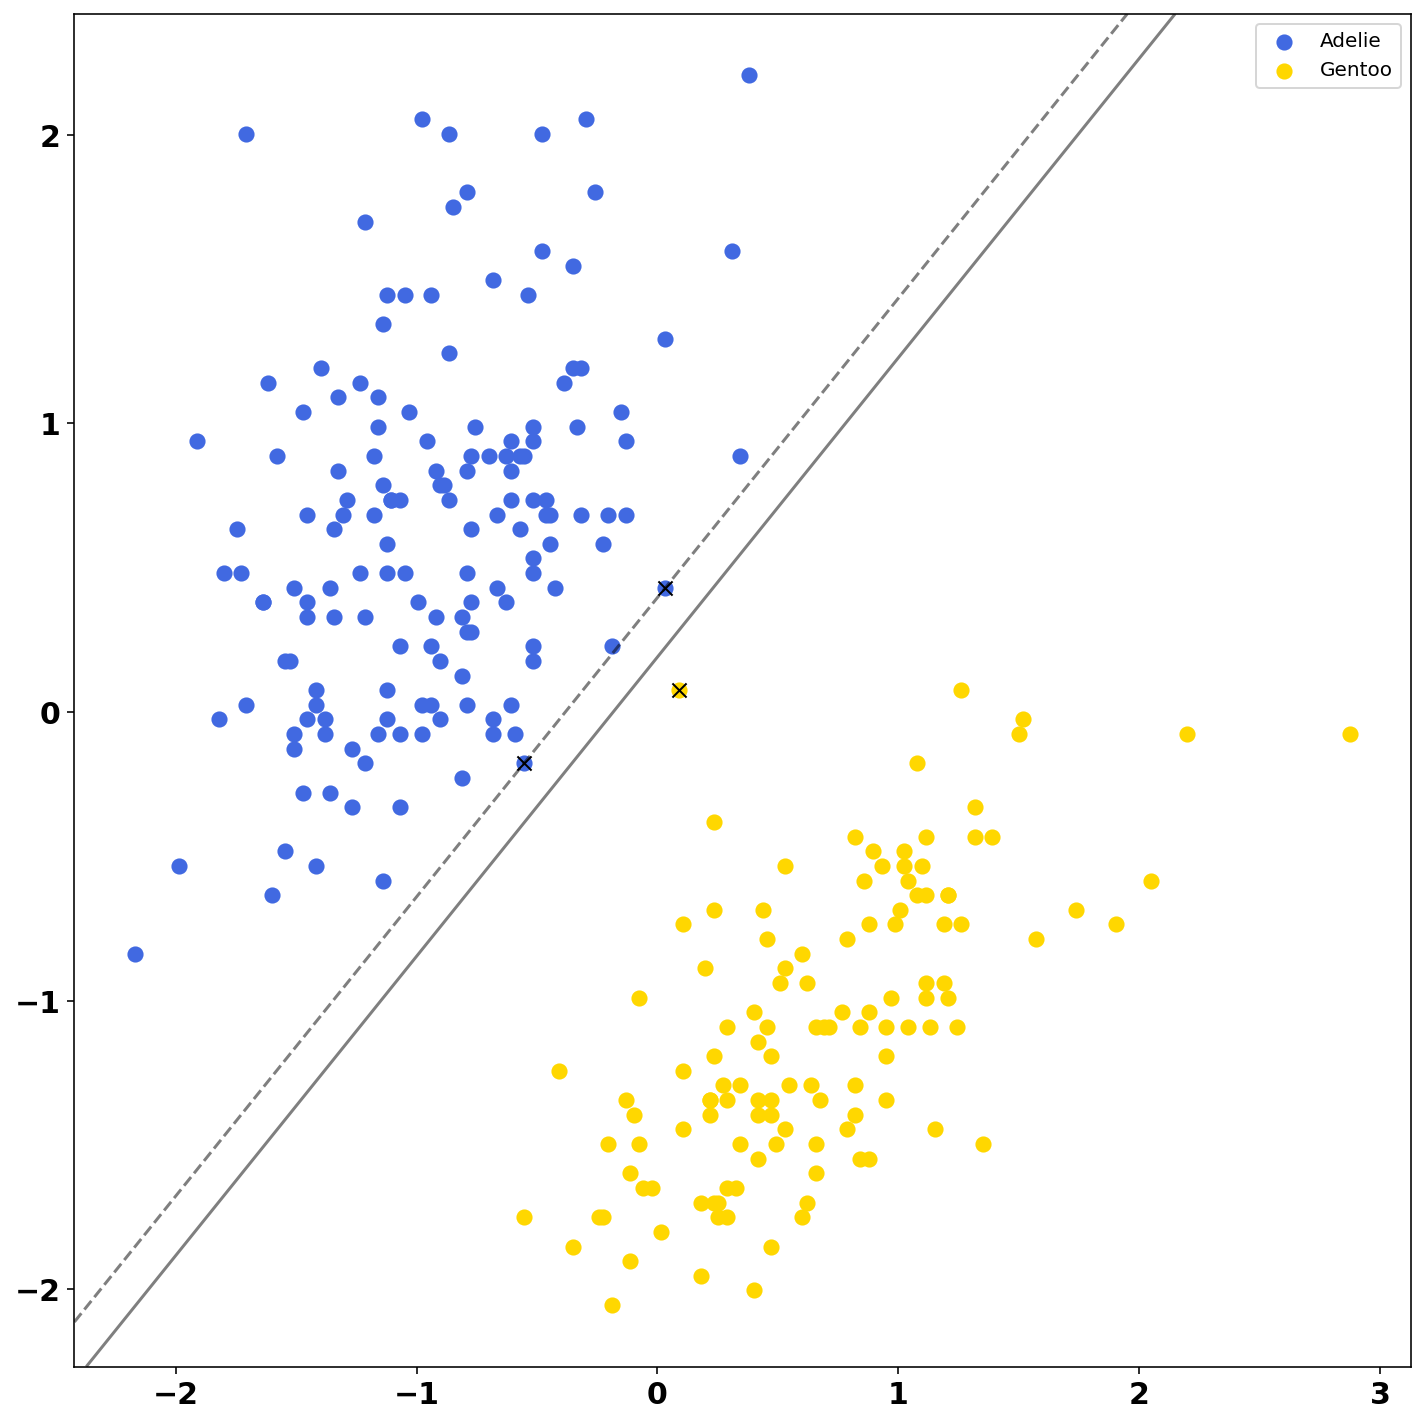

In [24]:
plt.figure(figsize=(10, 10))

# plot the point cloud
adelie = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==0]['bill_length_mm'], 
                     penguins_features_scaled[penguins_labels["species_int"]==0]['bill_depth_mm'], 
                    color="royalblue", 
                    s=50, 
                    label = 'Adelie',
                    cmap=plt.cm.Paired)

gentoo = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==2]['bill_length_mm'], 
                    penguins_features_scaled[penguins_labels["species_int"]==2]['bill_depth_mm'], 
                    color="gold", 
                    s=50, 
                    label = 'Gentoo',
                    cmap=plt.cm.Paired)

plt.legend()

# get frame limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
           s=50, linewidth=1, marker='x', color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0], 
           alpha=0.5, linestyles=['--', '-'])

# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

### Q3.

__Question :__ Que veut dire une performance de 1.0 ? Quels points sont vecteurs de supports ? 

__Réponse :__ Une performance de 1.0 signifie que le classifieur sépare parfaitement les deux groupes d'observations. On remarque que les points supports se trouvent tous sur la marge de l'hyperplan séparateur. Il n'y a aucun vecteur support (au sens donné par sklearn) dans la zone d'indécision. 

### 4. Représentation de la matrice de Gram

On peut interpréter le **noyau** (ou **kernel** ou **matrice de Gram**) comme une matrice de similarité entre les différentes observations. On s'appuie alors sur la ressemblance de certaines observations pour pouvoir les classifier. 

Nous allons représenter la matrice de Gram associée au précédent classifieur. Dans le cas d'un SVM à noyau linéaire, il s'agit du produit scalaire des variables. Pour que vous puissiez intuiter de manière juste la similarité entre les observations, nous allons nous ramener à une matrice avec des 1 sur la diagonale grâce à la fonction *center_an_normalise_kernel()*.

In [25]:
import math

def center_and_normalise_kernel(K_temp):

    K_temp = preprocessing.KernelCenterer().fit_transform(K_temp)
    nb_item = K_temp.shape[0]
    K_norm = np.zeros((nb_item, nb_item))
    for i in range(nb_item):
        for j in range(i, nb_item):
            K_norm[i, j] = K_temp[i, j] / math.sqrt(K_temp[i, i] * K_temp[j, j])
            K_norm[j, i] = K_norm[i, j]

    return K_norm

In [30]:
data.shape

(274, 2)

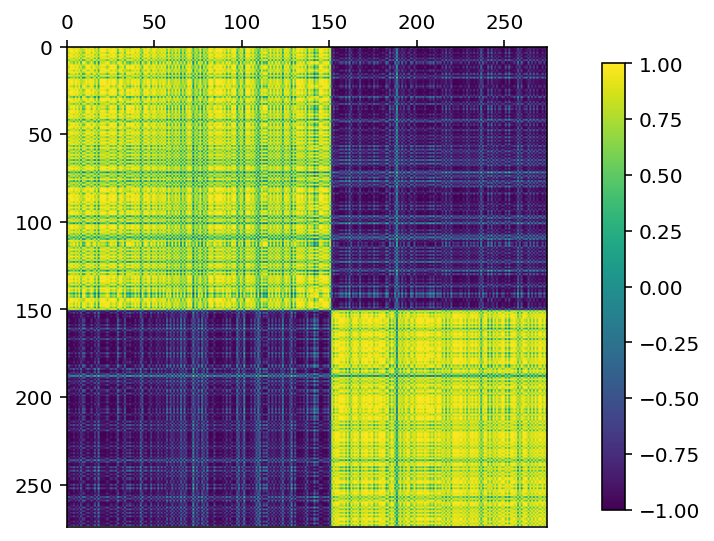

In [29]:
GramMatrix = np.inner(data, data)
GramMatrix_scaled = center_and_normalise_kernel(GramMatrix)

# heatmap + color map
fig, ax = plt.subplots(figsize=(5, 5))
plot = ax.imshow(GramMatrix_scaled) 

# set axes boundaries
ax.set_xlim([0, data.shape[0]]) ; ax.set_ylim([0, data.shape[0]])

# flip the y-axis
ax.invert_yaxis() ; ax.xaxis.tick_top()

# plot colorbar to the right
plt.colorbar(plot, pad=0.1, fraction=0.04)

### Q4.

__Question :__ Que remarquez-vous ? Est-ce vous auriez pu anticiper le fait que le classifieur "sépare" bien en ne regardant que la matrice de Gram ? 

__Réponse :__ La matrice de Gram fait bien apparaître les deux groupes de labels. De l'observation 0 à 151, les valeurs de la matrice (les similarités) sont proches de 1 entre elles alors qu'elles sont proches de -1 avec le deuxième groupe (de l'observation 152 à 273) et inversement. 
Les deux groupes de labels sont donc facilement discernables en ne regardant que leur matrice de similarité, on peut donc supposer que le classifieur pourra facilement les "séparer". A noter que la visualisation de la matrice n'est utile que si l'on a bien ordonné nos labels par classe. 

### 5. Cas un peu plus compliqué

Maintenant considérons les deux espèces: **Adelie (0)** et **Chinstrap (1)** et les variables: *body_mass_g* et *bill_depth_mm*.

In [31]:
# Select the 2 features
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,1])] 
data = np.array(data[["bill_depth_mm", "body_mass_g"]])
print("X shape:", data.shape)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,1])]
labels = np.array(labels["species_int"])
print("y shape:", labels.shape)

# initialize a model
clf = svm.SVC(kernel='linear', C=1000)

# fit the model
clf.fit(X= data, y = labels)

X shape: (219, 2)
y shape: (219,)


SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

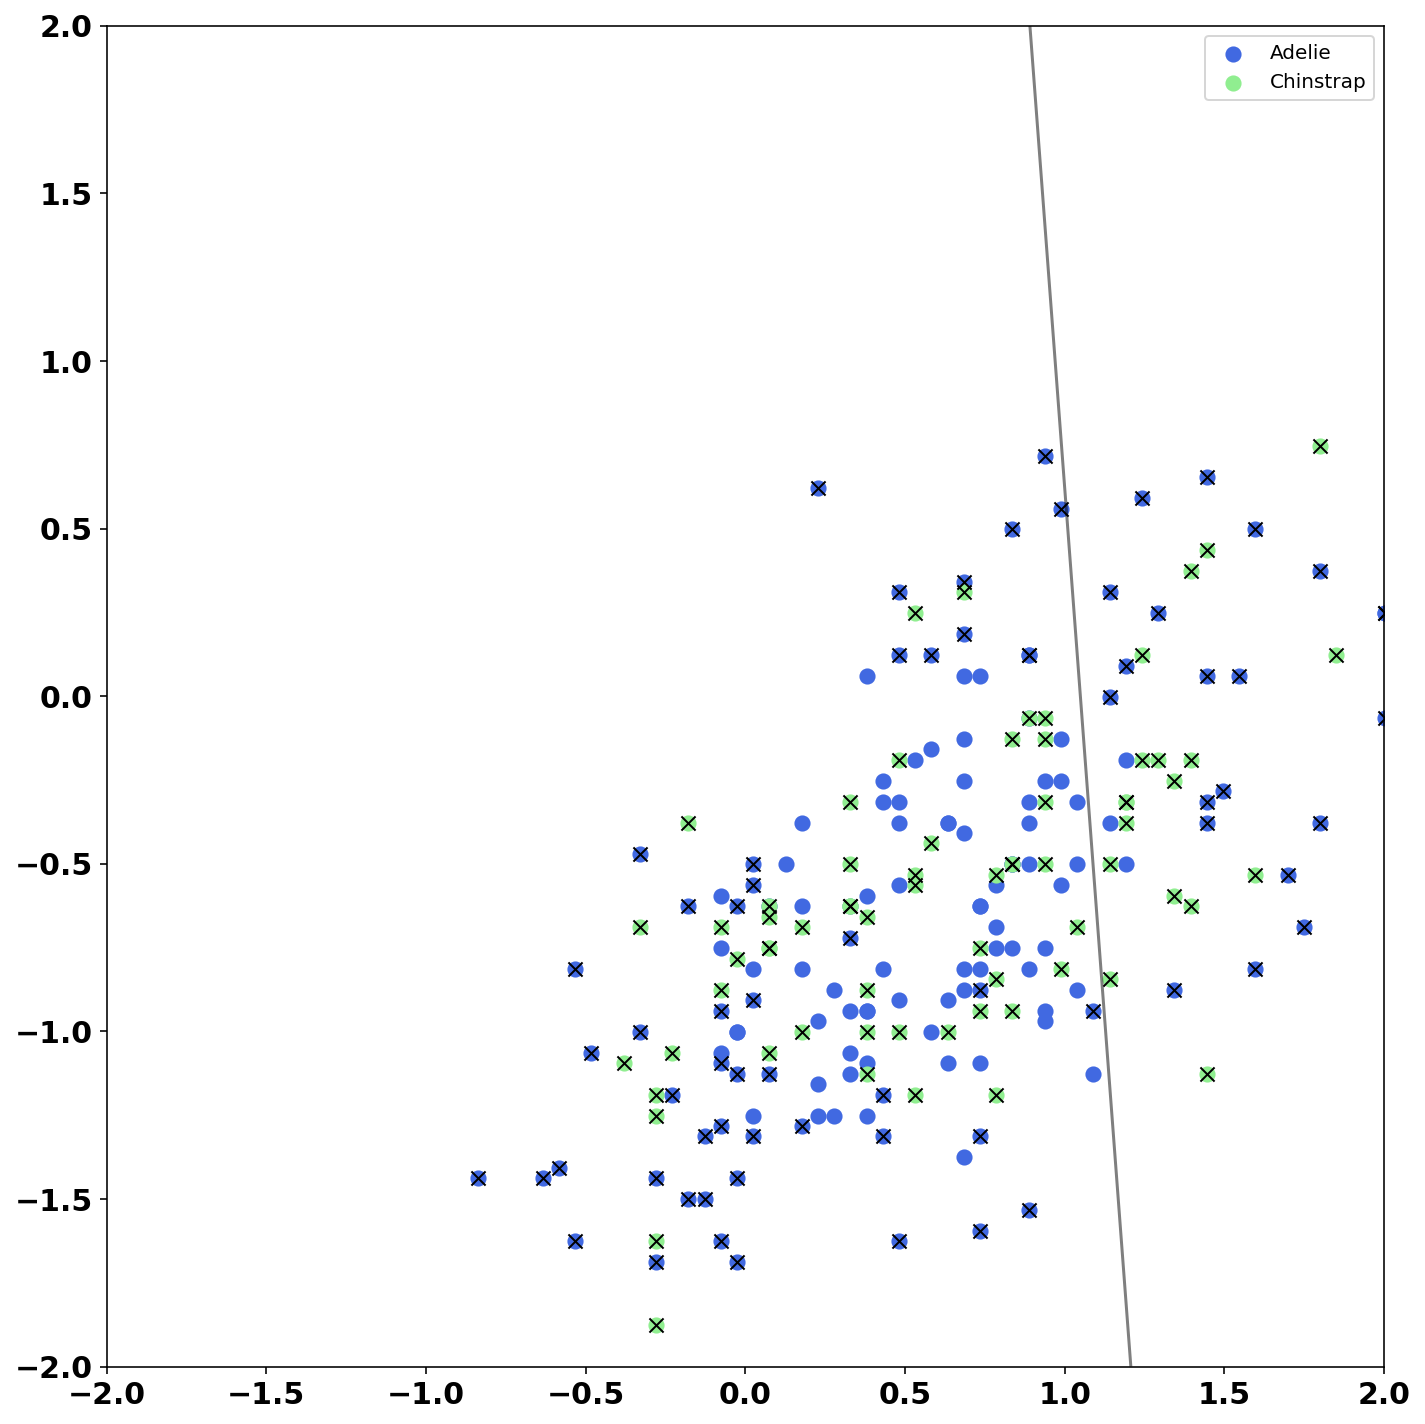

In [32]:
plt.figure(figsize=(10, 10))

# plot the point cloud
adelie = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==0]['bill_depth_mm'], 
                     penguins_features_scaled[penguins_labels["species_int"]==0]['body_mass_g'], 
                    color="royalblue", 
                    s=50, 
                    label = 'Adelie',
                    cmap=plt.cm.Paired)

gentoo = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==1]['bill_depth_mm'], 
                    penguins_features_scaled[penguins_labels["species_int"]==1]['body_mass_g'], 
                    color="lightgreen", 
                    s=50, 
                    label = 'Chinstrap',
                    cmap=plt.cm.Paired)



plt.legend()

# get frame limits
ax = plt.gca()

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], 
           clf.support_vectors_[:, 1], 
           s=50, 
           linewidth=1, 
           marker='x', 
           color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=0, 
           alpha=0.5, linestyles=[ '-',])


# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

Graphiquement, il n'est vraiment pas simple de distinguer et de séparer les deux espèces qu'avec une droite.

Quelle est la performance de ce modèle ?

In [33]:
print(clf.score(data, labels))

0.6894977168949772


Representons la matrice de Gram

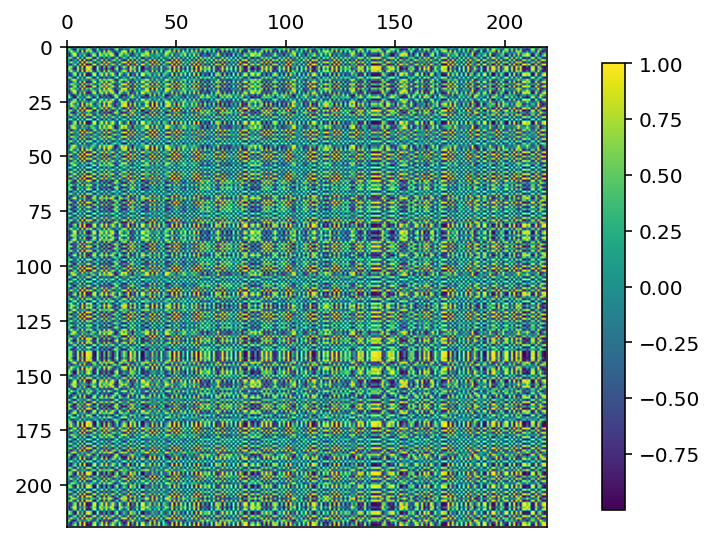

In [34]:
GramMatrix = np.inner(data, data)
GramMatrix_scaled = center_and_normalise_kernel(GramMatrix)

# heatmap + color map
fig, ax = plt.subplots(figsize=(5, 5))
plot = ax.imshow(GramMatrix_scaled) 

# set axes boundaries
ax.set_xlim([0, data.shape[0]]) ; ax.set_ylim([0, data.shape[0]])

# flip the y-axis
ax.invert_yaxis() ; ax.xaxis.tick_top()

# plot colorbar to the right
plt.colorbar(plot, pad=0.1, fraction=0.04)

### Q5.

__Question :__ Qu'observez-vous ?

__Réponse :__ On retrouve pas de pattern particulier, contrairement au cas précédent, alors que les labels sont aussi classés ! On comprend alors pourquoi le noyau linéaire ne permet pas de classifier simplement dans ce cas précis.

Essayons d'utiliser un autre type de noyau pour avoir une séparation plus complexe et mieux coller aux données !

## IV. SVM à noyau non linéaire

### 1. Noyau RBF

Nous allons utiliser un **noyau RBF** ou **radial gaussien**, pour plusieurs valeurs du paramètre gamma. En classe nous avons donné la formule du noyau gaussien :

\begin{align}
k(x, x') = \exp\bigg[-\frac{||x - x'||^2}{2 \sigma^2}\bigg]
\end{align}

### Q6.

__Question :__ À quoi correspond le paramètre gamma dans la formule du noyau gaussien ?

__Réponse :__ [Oubli dans l'énoncé] 
Une autre définition implique le paramètre gamma, $\gamma=\frac{1}{2 \sigma^{2}}$ : 

\begin{align}
k(x,x')=\exp\bigg[(-\gamma\||x - x'||^2\bigg]
\end{align}

Gamma est donc proportionnel à l'inverse du carré de sigma, qui correspond à *la bande passante* du noyau, ou plus intuitivement le rayon d'influence des observations du train set.
Si **sigma est grand** (donc **gamma petit**) alors les observations du train set vont avoir une influence de longue  portée, et la majorité d'entre eux vont avoir une influence sur la frontière de décision.
Celle ci va donc être "grossière" et lisse (smooth en anglais), quitte à ce que certaines prédictions soient fausses. 

Si **sigma est petit** (donc **gamma grand**) alors les observations du train set vont avoir une influence de courte portée, et seules celles proches de la frontière de décision auront une influence localement.
La frontière de décision va donc être "précise" mais on aura tendance à surapprendre.

Vous trouverez une explication claire et détaillée (mais en anglais) ici: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

Testons différentes valeurs de gamma.

In [35]:
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,1])] 
data = np.array(data[["bill_depth_mm", "body_mass_g"]])

labels = penguins_labels[penguins_labels["species_int"].isin([0,1])]
labels = np.array(labels["species_int"])

# gamma values
gamma_range = np.linspace(0.01, 200, 20)

for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=1.0, gamma=param)
    clf.fit(data, labels)
    score = clf.score(data, labels)
    print("gamma: {0:.2f} | score: {1:.2f}".format(param, score))

gamma: 0.01 | score: 0.69
gamma: 10.54 | score: 0.71
gamma: 21.06 | score: 0.74
gamma: 31.59 | score: 0.79
gamma: 42.11 | score: 0.80
gamma: 52.64 | score: 0.80
gamma: 63.16 | score: 0.84
gamma: 73.69 | score: 0.86
gamma: 84.22 | score: 0.87
gamma: 94.74 | score: 0.87
gamma: 105.27 | score: 0.88
gamma: 115.79 | score: 0.88
gamma: 126.32 | score: 0.88
gamma: 136.85 | score: 0.89
gamma: 147.37 | score: 0.89
gamma: 157.90 | score: 0.89
gamma: 168.42 | score: 0.89
gamma: 178.95 | score: 0.89
gamma: 189.47 | score: 0.90
gamma: 200.00 | score: 0.91


### Q7.

__Question :__ Quelle valeur de gamma serions-nous tenter de prendre pour avoir un meilleur modèle?

__Réponse :__ La plus grande valeur de gamma (200) pour laquelle le score est le plus élevé (0.91).

### 2. Généralisation

Est-ce que ce modèle se __généralise__ bien, autrement dit, sera-t-il capable de faire de bonnes prédictions sur de nouvelles données que nous n'avons pas utilisées pour le construire ? 

Pour le savoir, nous allons séparer les données en un __jeu d'entraînement__ et un __jeu de test__. Nous allons entraîner nos SVMs sur le jeu d'entraînement seulement, et mesurer leur performance sur le jeu de test. Le jeu de test, étant inconnu au moment de l'entraînement, fait figure de nouvelles données. Pour cela nous allons utiliser la fonction [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn.

Nous devons faire le split sur les variables non standardisées, standardiser le jeu de train, puis standardiser le jeu de test en fonction de la variance et de la moyenne des variables du jeu de train.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# split the dataset between train and test
data = penguins_features[penguins_labels["species_int"].isin([0,1])] 
data = np.array(data[["bill_depth_mm", "body_mass_g"]])

labels = penguins_labels[penguins_labels["species_int"].isin([0,1])]
labels = np.array(labels["species_int"])

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=.2, 
                                                    random_state=21)

In [38]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

In [39]:
# test the performance for different values of gamma
acc_train, acc_test = list(), list()
gamma_range = np.linspace(0.01, 200, 20)
for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=0.8, gamma=param)
    clf.fit(X_train_scaled, y_train)
    acc_train.append(clf.score(X_train_scaled, y_train))
    acc_test.append(clf.score(X_test_scaled, y_test))

Représentons la performance en fonction des valeurs de Gamma testées

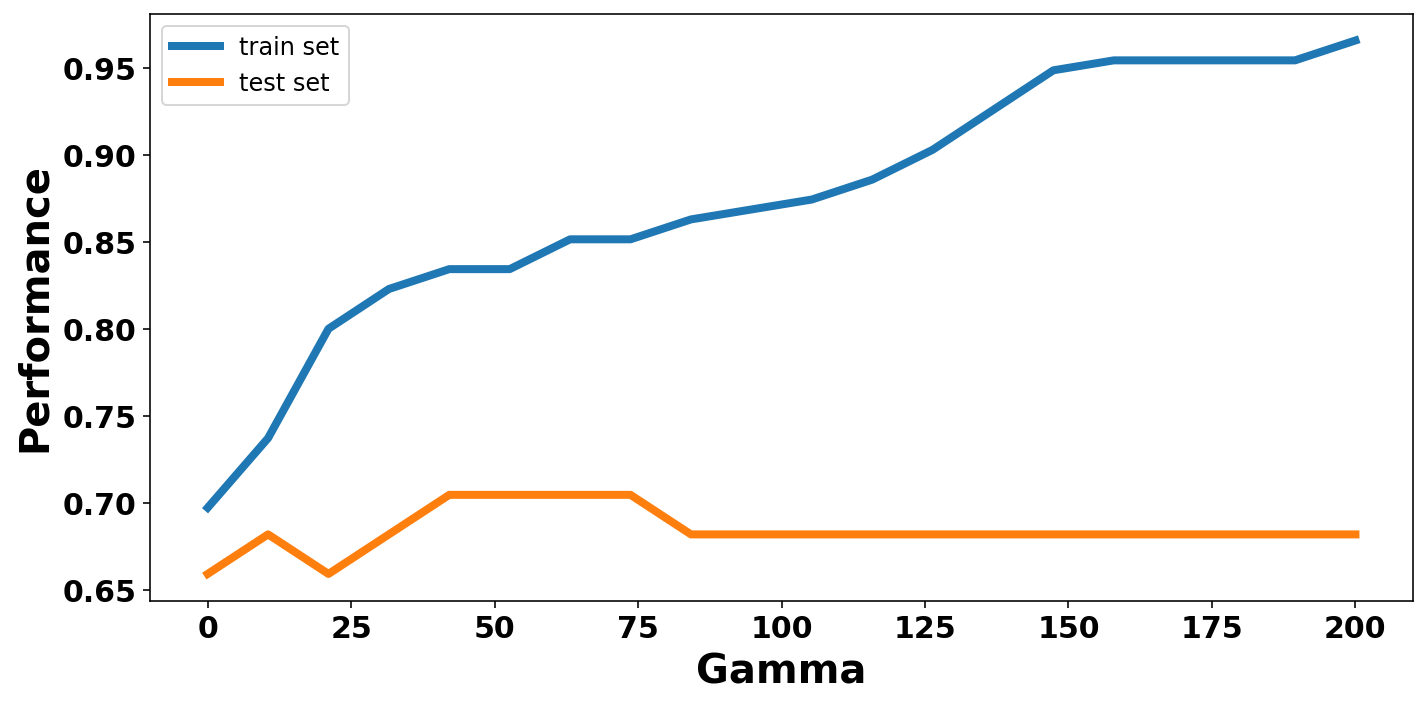

In [40]:
plt.figure(figsize=(10, 5))

# plot train and test scores for different gamma values
plt.plot(gamma_range, acc_train, label='train set', lw=4)
plt.plot(gamma_range, acc_test, label='test set', lw=4)

# add a legend
plt.legend(loc='best', fontsize=12)

# format the plot
plt.xlabel("Gamma", fontweight="bold", fontsize=20)
plt.ylabel("Performance", fontweight="bold", fontsize=20)
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

### Q8.

__Question :__ Observez-vous un effet de surapprentissage ? Où ? 

__Réponse :__  On remarque un effet de surapprentissage à partir de gamma=75 où la performance sur le train set continue d'augmenter alors que celle du test set diminue.

Le graphique ci-dessus nous donne envie de prendre pour le paramètre gamma une valeur entre de 50 ou 75. Mais attention ! Si nous prenons le paramètre qui marche le mieux sur le dataset de test, nous risquons aussi de surapprendre : nous aurons alors utilisé le jeu de test pour choisir le meilleur modèle, autrement dit, nous aurons touché aux données soi-disant inconnuees lors de l'apprentissage...

Pour éviter cela, nous devons faire une __validation croisée__ (_cross-validation_) sur le jeu d'entraînement.

Regardons les performances en faisant varier les paramètres *gamma* et *C*.
Nous allons pour cela utiliser la classe [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) du module model_selection de scikit-learn.

In [41]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [42]:
# define a set of parameter to test
parameters = {'gamma':[ 1, 10, 20, 50], 
              'C':[1, 10, 100]}

# initialize a model
svc = svm.SVC(kernel='rbf')

# initialize cross validation
clf = GridSearchCV(estimator=svc, 
                   param_grid=parameters,
                   cv=5)

# run the cross validation using train dataset
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [1, 10, 20, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

[[0.69714286 0.65714286 0.64      ]
 [0.65142857 0.64       0.58285714]
 [0.62285714 0.59428571 0.60571429]
 [0.60571429 0.6        0.59428571]]


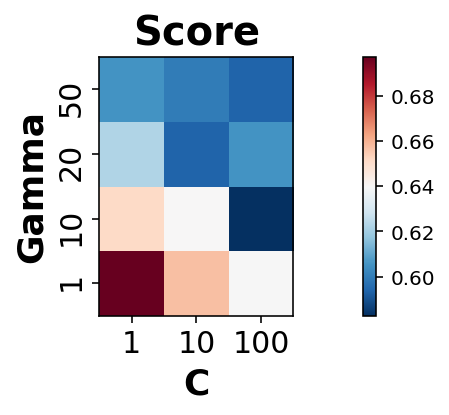

In [43]:
plt.figure(figsize=(10, 3))

# format results from gridsearch
scores = clf.cv_results_['mean_test_score'].reshape(len(parameters['gamma']), len(parameters['C']))
print(scores)

# plot performance scores
# plt.imshow(scores, interpolation='none')
plt.imshow(scores, interpolation='none', cmap="RdBu_r")

# add a colorbar
plt.colorbar()

# format the plot
plt.title("Score", fontweight="bold", fontsize=20)
plt.xlabel("C", fontweight="bold", fontsize=18)
plt.ylabel("Gamma", fontweight="bold", fontsize=18)
plt.ylim((-0.5, 3.5))
plt.xticks(np.arange(len(parameters['C'])), parameters['C'], fontsize=15)
plt.yticks(np.arange(len(parameters['gamma'])), parameters['gamma'], rotation=90, fontsize=15)
plt.tight_layout()

plt.show()

### Q9.

__Question :__ Quel est le rôle du paramètre C ? Qu'observez-vous quand C est grand ? 

__Réponse :__  C peut être interprété comme un paramètre de régularisation: plus C est grand moins on régularise (la marge autour de l'hyperplan séparateur va être faible). Ce n'est donc pas étonnant de remarquer que le score diminue quand C augmente.
Comme gamma, vous trouverez une description claire (mais en anglais) de C ici: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html.

### Q10.

__Question :__ Finalement, quelles valeurs de C et gamma allez vous prendre ?

__Réponse :__  C=1, gamma=1

## Mise en pratique

Sélectionnons les meilleurs paramètres de SVM pour la classification avec les 4 variables (*bill_depth_mm*,  *bill_length_mm*, *flipper_length_mm* et *body_mass_g*).

__Question :__ Entraînez un SVM de classification pour séparer les données sur les deux problèmes (Adélie vs Gentoo, puis Adélie vs Chinstrap). Entraînez votre SVM en validation croisée sur le jeu d'entraînement. Quels paramètres pouvez-vous faire varier ? Quelle est la performance de votre modèle optimal _sur le jeu de test_ ? 

### 1) Adélie (0) vs Gentoo (2)

In [81]:
# Réponse
from sklearn import preprocessing

# Select the 2 features
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,2])] 
data = np.array(data)

# Scale them
std_scale = preprocessing.StandardScaler().fit(data)
data_scaled = std_scale.transform(data)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,2])]
labels = np.array(labels["species_int"])

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=.2, 
                                                    random_state=21)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

# define a set of parameter to test
parameters = {'gamma':[ 0.1, 1, 10, 20, 50], 
              'C':[0.1, 1, 10, 100]}

# initialize a model
svc = svm.SVC(kernel='rbf')

# initialize cross validation
clf = GridSearchCV(estimator=svc, 
                   param_grid=parameters,
                   cv=5)

# run the cross validation using train dataset
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 20, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

[[1.         0.99534884 0.55708245 0.55708245]
 [0.55708245 1.         1.         0.93139535]
 [0.80824524 0.5845666  1.         1.        ]
 [0.94048626 0.83551797 0.63932347 1.        ]
 [1.         0.94048626 0.83551797 0.63932347]]


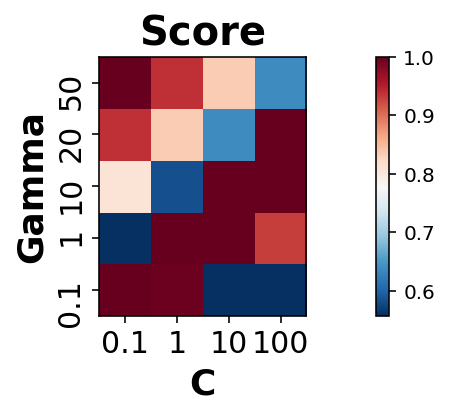

In [82]:
plt.figure(figsize=(10, 3))

# format results from gridsearch
scores = clf.cv_results_['mean_test_score'].reshape(len(parameters['gamma']), len(parameters['C']))
print(scores)

# plot performance scores
# plt.imshow(scores, interpolation='none')
plt.imshow(scores, interpolation='none', cmap="RdBu_r")

# add a colorbar
plt.colorbar()

# format the plot
plt.title("Score", fontweight="bold", fontsize=20)
plt.xlabel("C", fontweight="bold", fontsize=18)
plt.ylabel("Gamma", fontweight="bold", fontsize=18)
plt.ylim((-0.5, 4.5))
plt.xticks(np.arange(len(parameters['C'])), parameters['C'], fontsize=15)
plt.yticks(np.arange(len(parameters['gamma'])), parameters['gamma'], rotation=90, fontsize=15)
plt.tight_layout()

plt.show()

In [83]:
clf.best_params_

{'C': 0.1, 'gamma': 0.1}

In [84]:
clf.score(X_test_scaled, y_test)

1.0

On remarque que le classifieur peut atteindre une performance de 1 pour plusieurs choix de paramètres. Ce n'est pas très étonnant car on a vu avec un svm linéaire et seulement deux variables qu'on pouvait obtenir une performance de 1. (cf III.3 Cas parfait)

En bonus, voici le scatterplot de chaque variable pour ces deux classes. On remarque que les valeurs sont assez disjointes pour la plupart des variables, ce qui nous conforte dans la performance trouvée par GridSearch.

In [85]:
penguins_adelie_gentoo = pd.concat([penguins_features[penguins_labels["species_int"].isin([0,2])],
                                    penguins_labels[penguins_labels["species_int"].isin([0,2])]],
                                     axis = 1)

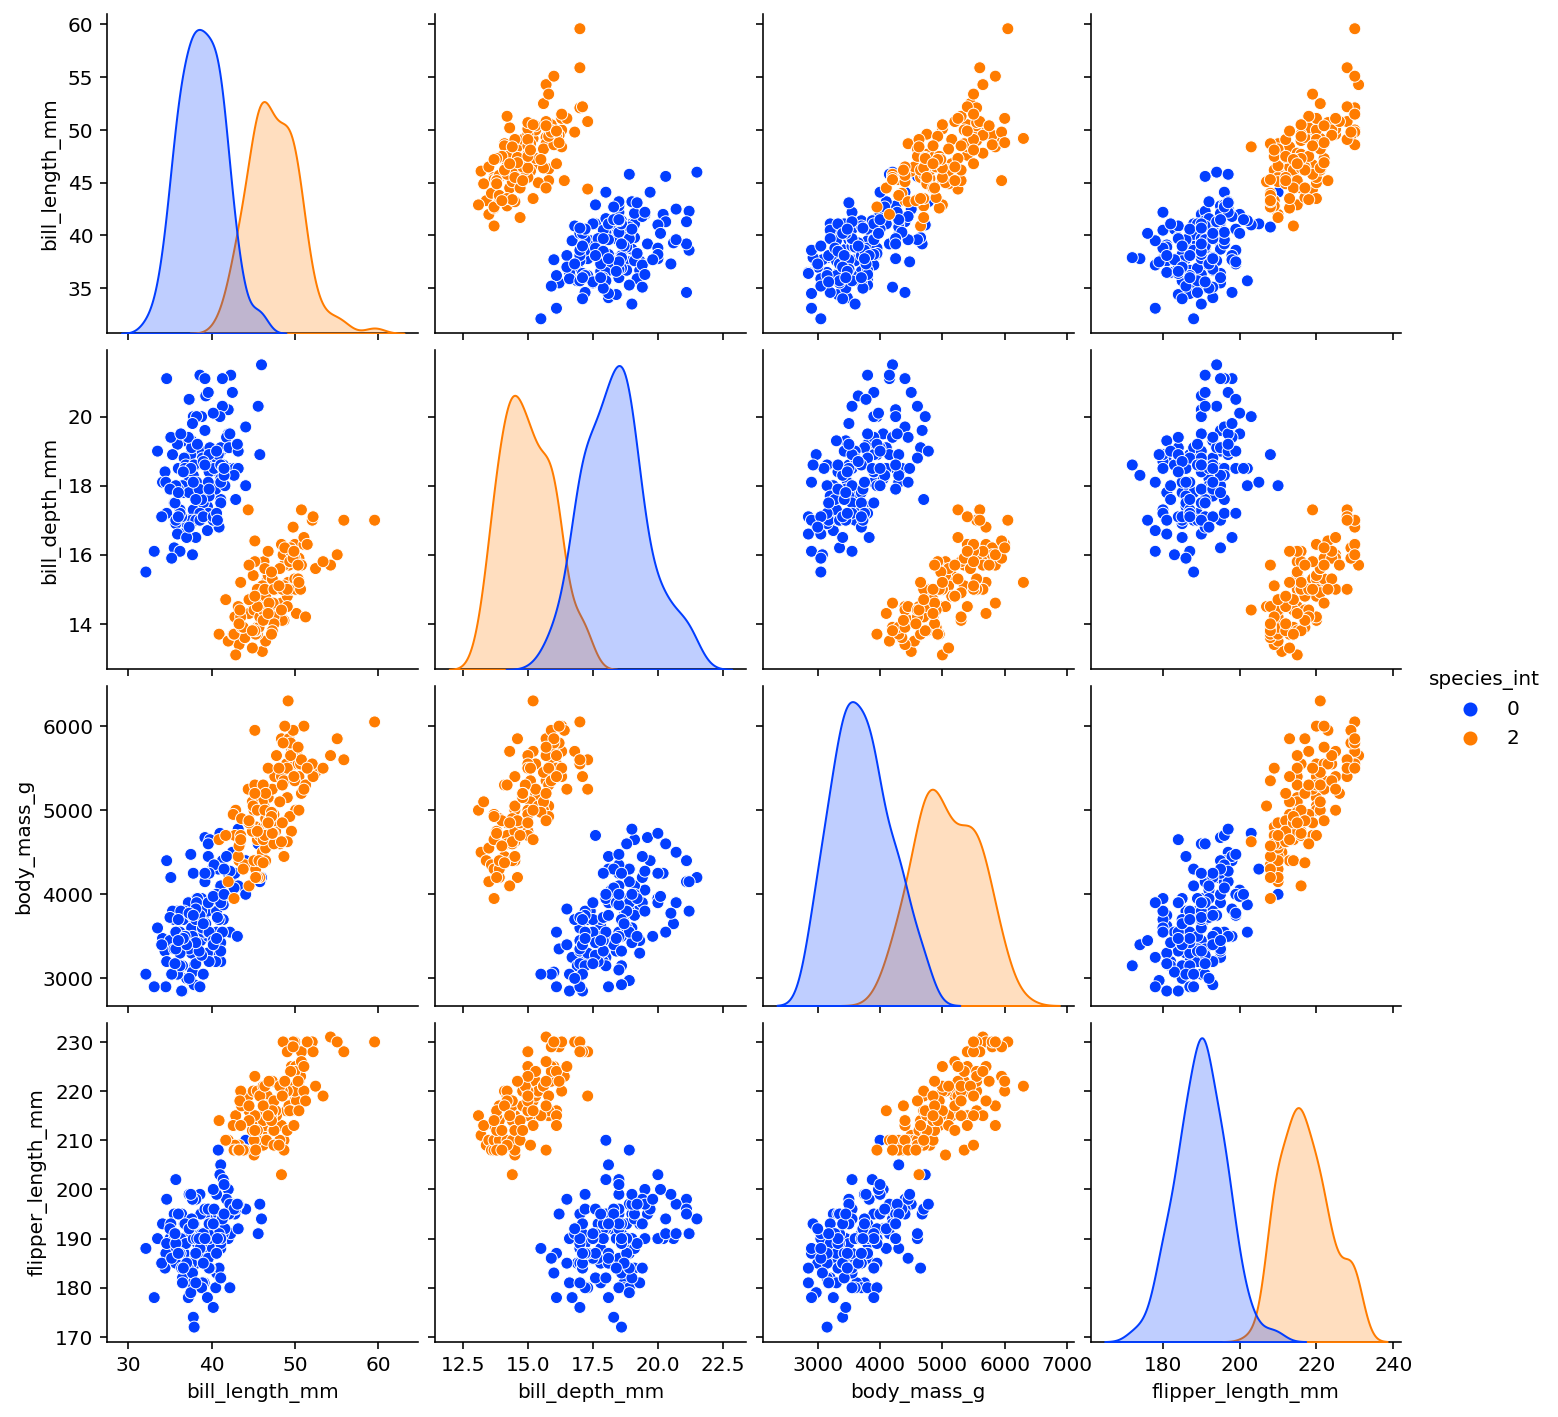

In [86]:
import seaborn as sns
sns.pairplot(penguins_adelie_gentoo, hue="species_int",palette="bright")

### 2) Adélie (0) vs Chinstrap (1)

On reproduit la même chose pour ces classes.

In [87]:
# Réponse
# Réponse
from sklearn import preprocessing

# Select the 2 features
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,1])] 
data = np.array(data)

# Scale them
std_scale = preprocessing.StandardScaler().fit(data)
data_scaled = std_scale.transform(data)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,1])]
labels = np.array(labels["species_int"])

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=.2, 
                                                    random_state=21)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

# define a set of parameter to test
parameters = {'gamma':[ 0.1, 1, 10, 20, 50], 
              'C':[0.1, 1, 10, 100]}

# initialize a model
svc = svm.SVC(kernel='rbf')

# initialize cross validation
clf = GridSearchCV(estimator=svc, 
                   param_grid=parameters,
                   cv=5)

# run the cross validation using train dataset
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 20, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

[[0.91428571 0.70857143 0.69714286 0.69714286]
 [0.69714286 0.97714286 0.96571429 0.69714286]
 [0.69714286 0.69714286 0.96571429 0.97142857]
 [0.73142857 0.69714286 0.69714286 0.96571429]
 [0.97142857 0.73142857 0.69714286 0.69714286]]


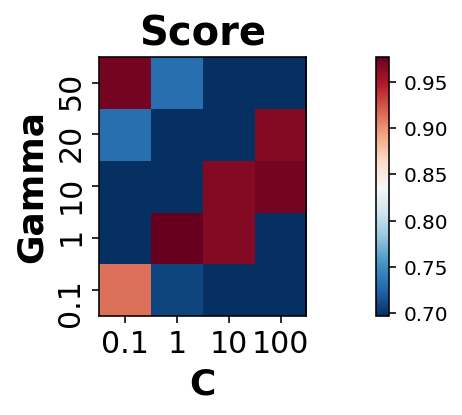

In [88]:
plt.figure(figsize=(10, 3))

# format results from gridsearch
scores = clf.cv_results_['mean_test_score'].reshape(len(parameters['gamma']), len(parameters['C']))
print(scores)

# plot performance scores
# plt.imshow(scores, interpolation='none')
plt.imshow(scores, interpolation='none', cmap="RdBu_r")

# add a colorbar
plt.colorbar()

# format the plot
plt.title("Score", fontweight="bold", fontsize=20)
plt.xlabel("C", fontweight="bold", fontsize=18)
plt.ylabel("Gamma", fontweight="bold", fontsize=18)
plt.ylim((-0.5, 4.5))
plt.xticks(np.arange(len(parameters['C'])), parameters['C'], fontsize=15)
plt.yticks(np.arange(len(parameters['gamma'])), parameters['gamma'], rotation=90, fontsize=15)
plt.tight_layout()

plt.show()

In [89]:
clf.best_params_

{'C': 1, 'gamma': 0.1}

In [90]:
clf.score(X_test_scaled, y_test)

0.9772727272727273

In [79]:
penguins_adelie_chinstrap = pd.concat([penguins_features[penguins_labels["species_int"].isin([0,1])],
                                    penguins_labels[penguins_labels["species_int"].isin([0,1])]],
                                     axis = 1)

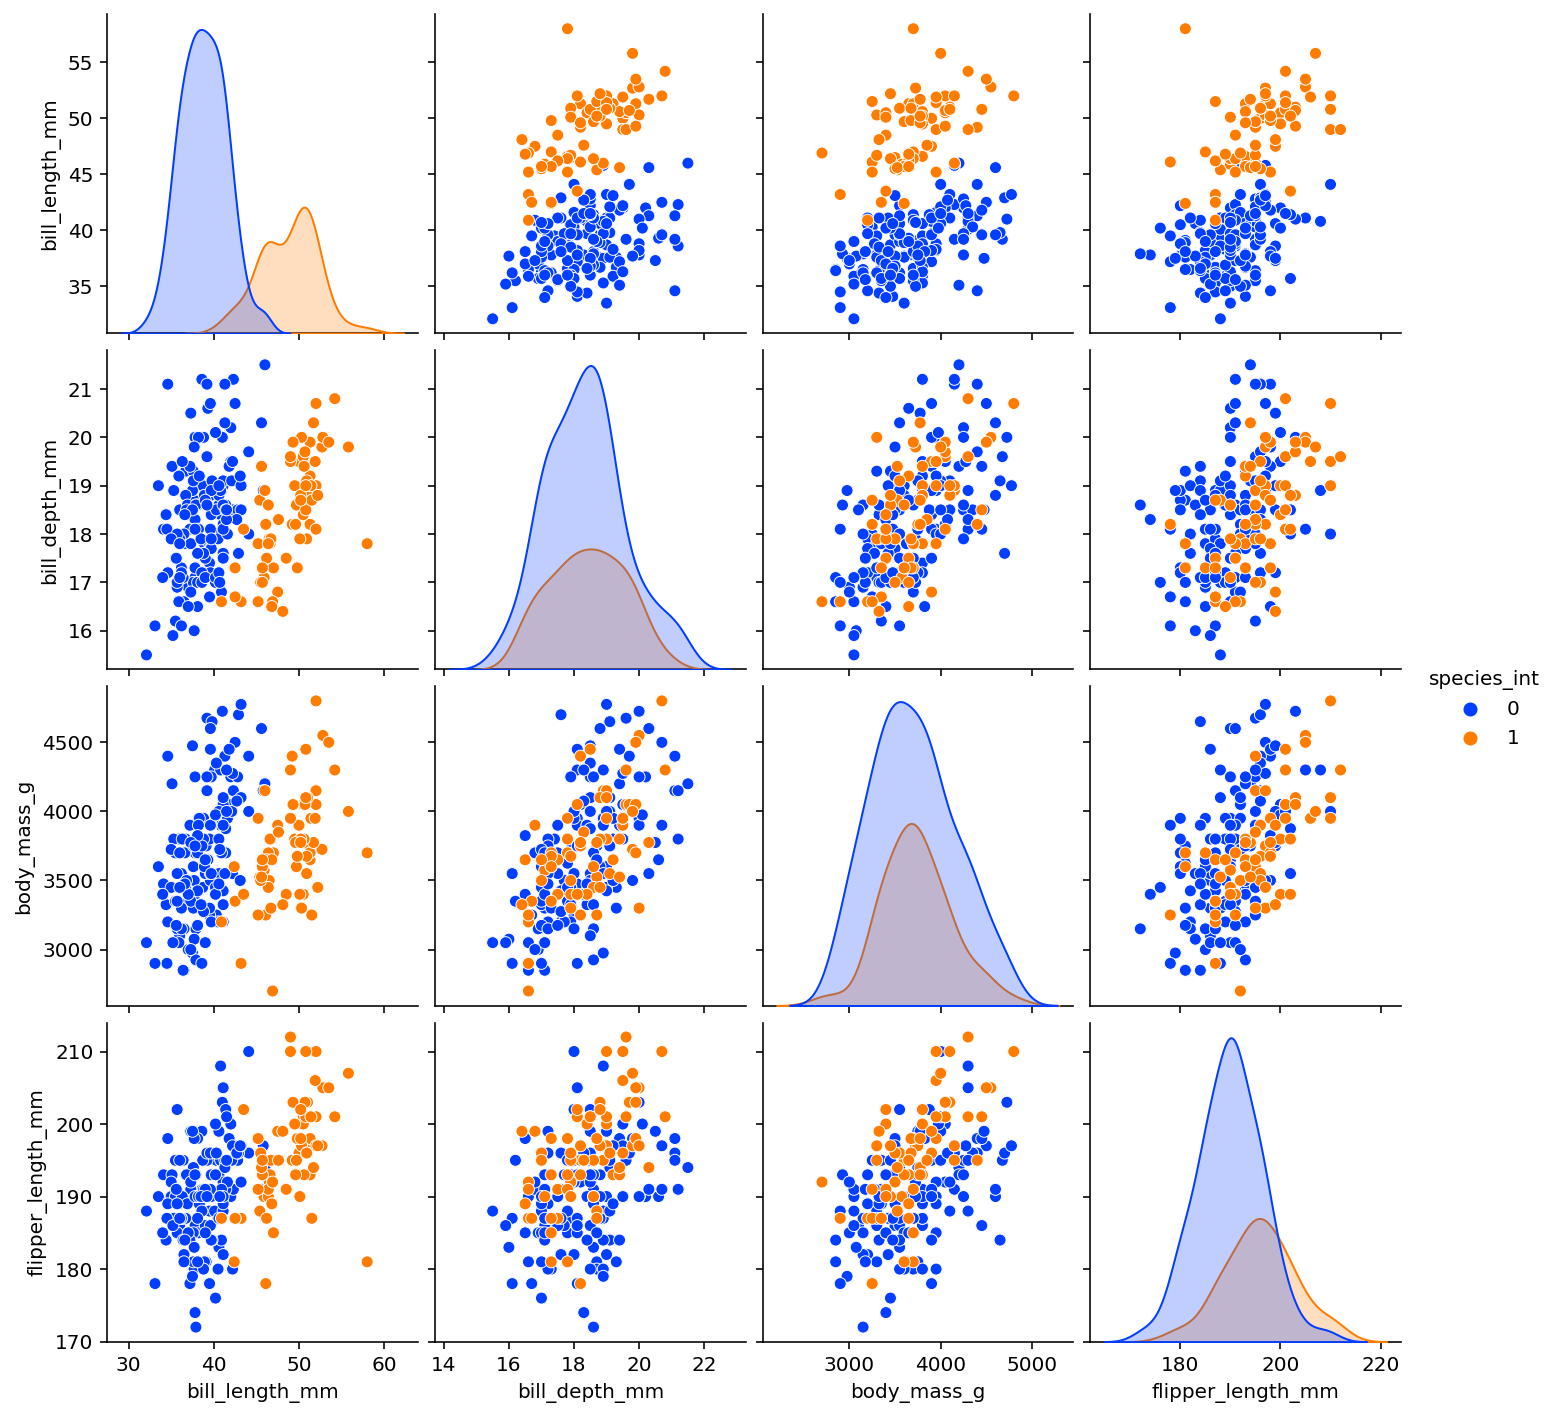

In [80]:
import seaborn as sns
sns.pairplot(penguins_adelie_chinstrap, hue="species_int",palette="bright")

### Question bonus

__Question :__ Comment construiriez-vous un modèle multi-classe, à base de SVMs, qui assigne une nouvelle observation à une des trois espèces Adélie (0), Chinstrap (1) ou Gentoo (2)?

__Réponse :__